# **Importing Necessary Libraries**
For Data Exploration, Cleaning and EDA

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [19]:
# Loading the data from a .csv in the same folder
raw_data = pd.read_csv("insurance.csv")

# Let's explore the top 5 rows of the df
raw_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Preprocessing

### Exploring the descriptive statistics of the variables

In [20]:
raw_data.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

In [21]:
# Our objective is to find a way to estimate the value in 'charges' column using the values in other columns by simply asking for information like their BMI,Age,Sex,No. of Children,Smoking habits and Region.

In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
raw_data.isnull().sum()
#The dataset contains 1338 rows and 7 columns.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
#Clearly our dataset contains no missing values.

In [25]:
raw_data[raw_data.duplicated()]   #Displaying Duplicate Rows

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [26]:
data=raw_data.drop_duplicates()         #Dropping the duplicate row

In [27]:
data.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1337.000000  1337  1337.000000  1337.000000   1337       1337   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   675          NaN          NaN   1063        364   
mean      39.222139   NaN    30.663452     1.095737    NaN        NaN   
std       14.044333   NaN     6.100468     1.205571    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.290000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.700000     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1337.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13279.121487  
std     12110.359656  
min      1121.873900  
25%      4746.344000  
50%      9386.161300  
75%     16657.717450  
max     63770.428010

### Exploring the PDFs

C:\Users\178ab\AppData\Local\Temp\ipykernel_9852\3817261975.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Density'>

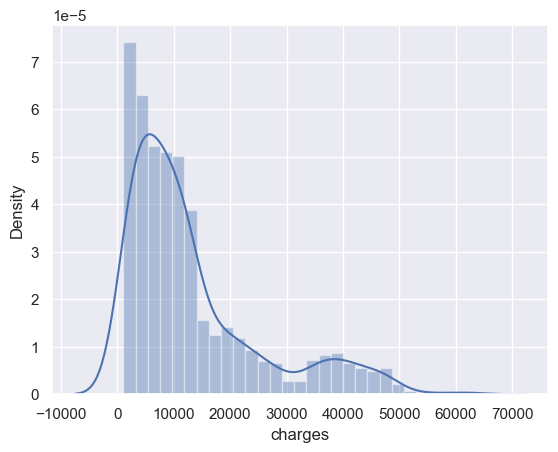

In [28]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['charges'])

### Dealing with outliers

There are some outliers present in the charges.
We can deal with the problem easily by removing 0.5% or 1% of the problematic samples
Here, the outliers are situated around the higher charges (right side of the graph)
Outliers are a great issue for OLS, thus we must deal with them in some way

Let's declare a variable that will be equal to the 99th percentile of the 'charge' variable
 

In [29]:
q = data['charges'].quantile(0.99)

Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Charge'

C:\Users\178ab\AppData\Local\Temp\ipykernel_9852\2021082028.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['charges'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Density'>

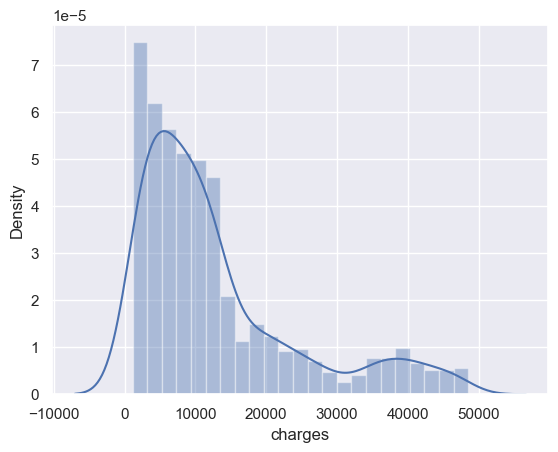

In [30]:
new_data = data[data['charges']<q]
sns.distplot(new_data['charges'])

In [31]:
#In this way we have essentially removed the top 1% of the data about 'Price' which are acting as outliers

In [32]:
new_data.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1323.000000  1323  1323.000000  1323.000000   1323       1323   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   666          NaN          NaN   1063        357   
mean      39.105064   NaN    30.585397     1.098262    NaN        NaN   
std       14.020204   NaN     6.070206     1.206772    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       26.000000   NaN    26.220000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.250000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.457500     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1323.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    12855.746872  
std     11435.439882  
min      1121.873900  
25%      4718.863800  
50%      9283.562000  
75%     16077.106125  
max     48517.563150

C:\Users\178ab\AppData\Local\Temp\ipykernel_9852\913292666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['charges'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Density'>

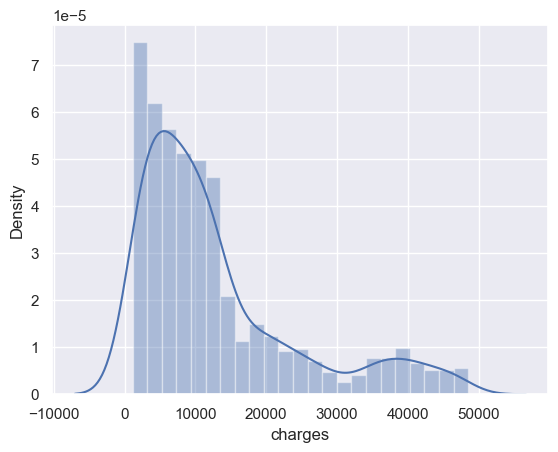

In [33]:
sns.distplot(new_data['charges'])

C:\Users\178ab\AppData\Local\Temp\ipykernel_9852\715337557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Density'>

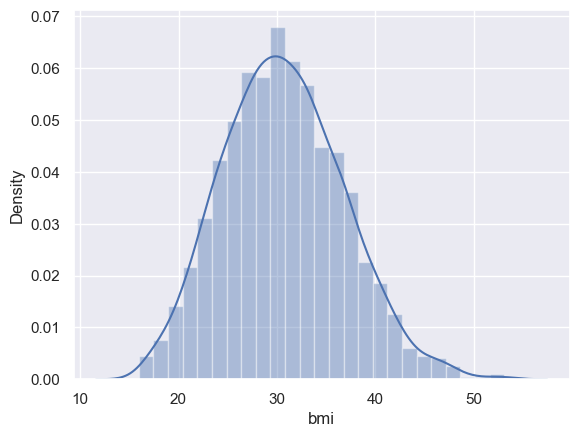

In [34]:
sns.distplot(data['bmi'])

C:\Users\178ab\AppData\Local\Temp\ipykernel_9852\3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

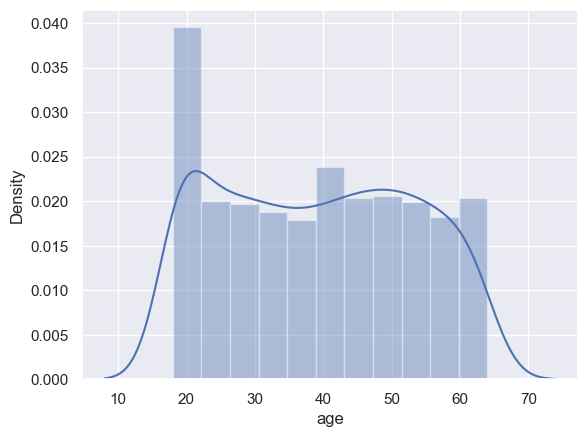

In [35]:
sns.distplot(data['age'])

In [36]:
new_data.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1323.000000  1323  1323.000000  1323.000000   1323       1323   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   666          NaN          NaN   1063        357   
mean      39.105064   NaN    30.585397     1.098262    NaN        NaN   
std       14.020204   NaN     6.070206     1.206772    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       26.000000   NaN    26.220000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.250000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.457500     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1323.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    12855.746872  
std     11435.439882  
min      1121.873900  
25%      4718.863800  
50%      9283.562000  
75%     16077.106125  
max     48517.563150

## Exploratory Data Analysis
To get better idea about various distributions and relations.

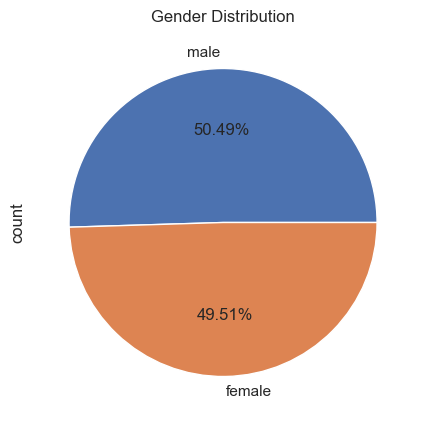

In [37]:
plt.figure(figsize=(5, 5))
data['sex'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

In [38]:
#It appears that the percentage of males is slightly greater than the percentage of females.

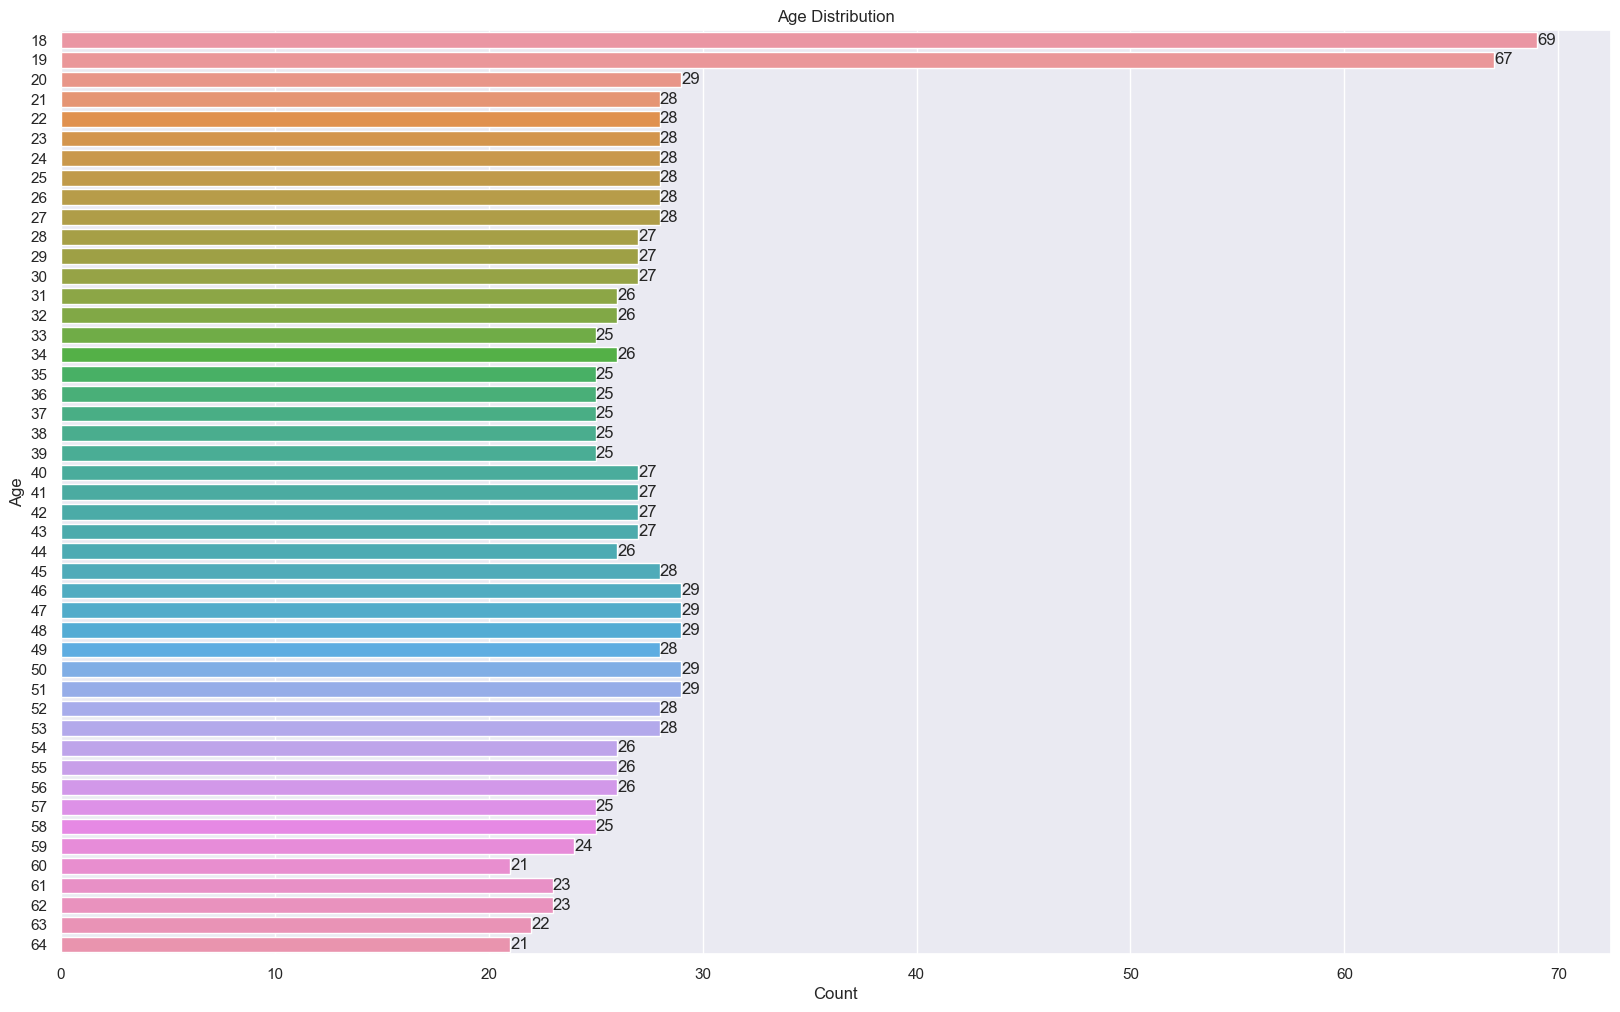

In [39]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data=new_data, y="age")
plt.xlabel('Count')
plt.ylabel('Age')
ax.bar_label(ax.containers[0])
plt.title('Age Distribution')
plt.show()

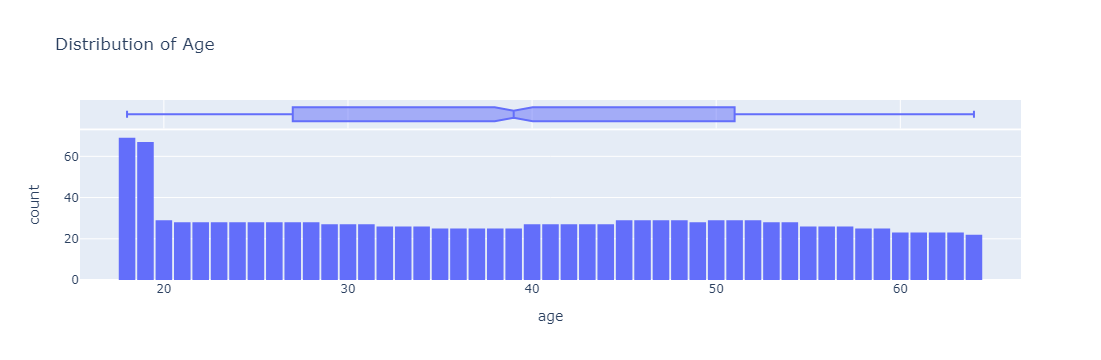

In [40]:
fig = px.histogram(data, x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()


In [41]:
#The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

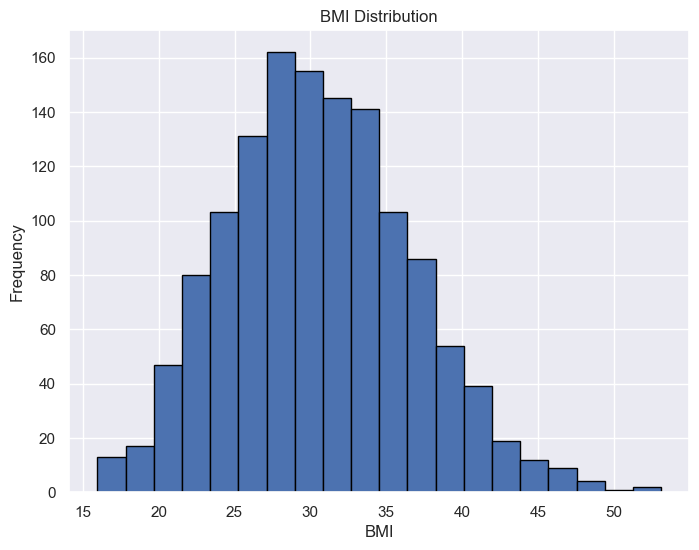

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(new_data['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

In [43]:
#The measurements of body mass index seem to follow a Normal distribution centered around the value 30, with a few outliers towards the right.

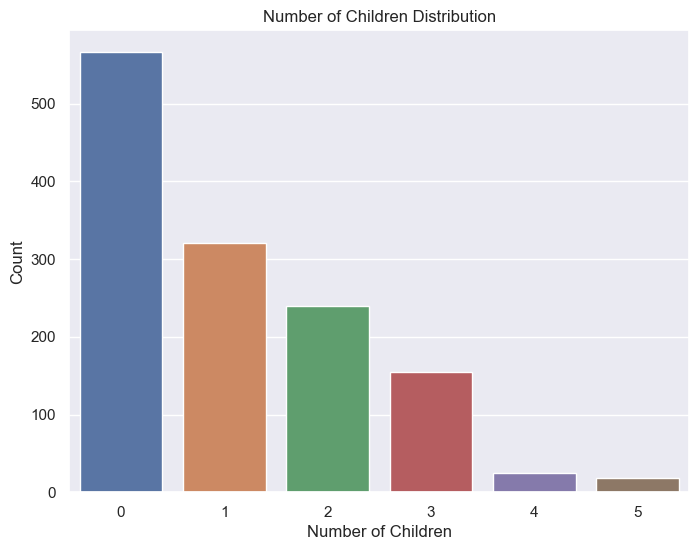

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=new_data, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

In [45]:
#It appears that maximum no.of persons in our data have no children

In [46]:
#Let's visualize the distribution of the "smoker" column (containing values "yes" and "no").

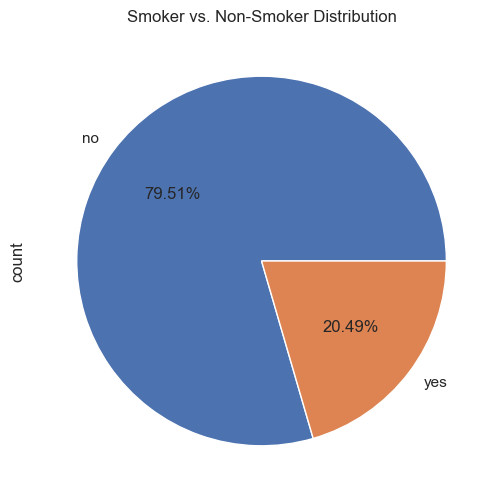

In [47]:
plt.figure(figsize=(8, 6))
data['smoker'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

In [48]:
data.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

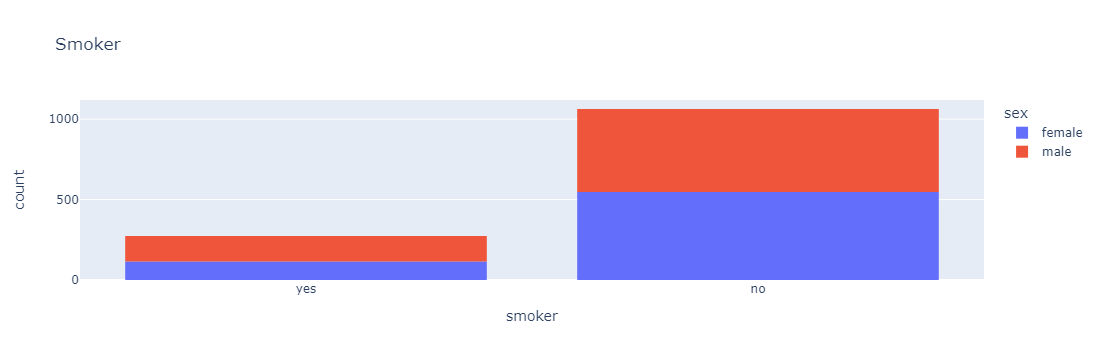

In [49]:
px.histogram(data, x='smoker', color='sex', title='Smoker')

In [50]:
#It appears that 20% of customers have reported that they smoke.We can also see that smoking appears a more common habit among males.

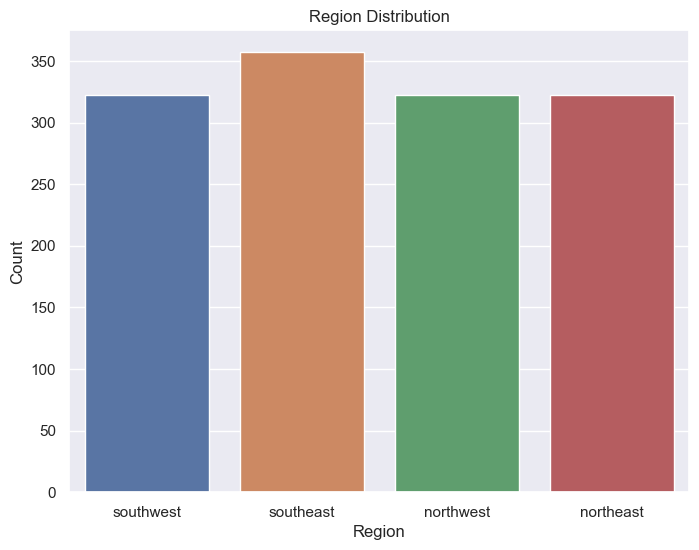

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=new_data, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

In [52]:
# The proportion of people from southeast region is fairly high as compared to the people belonging from the other regions.

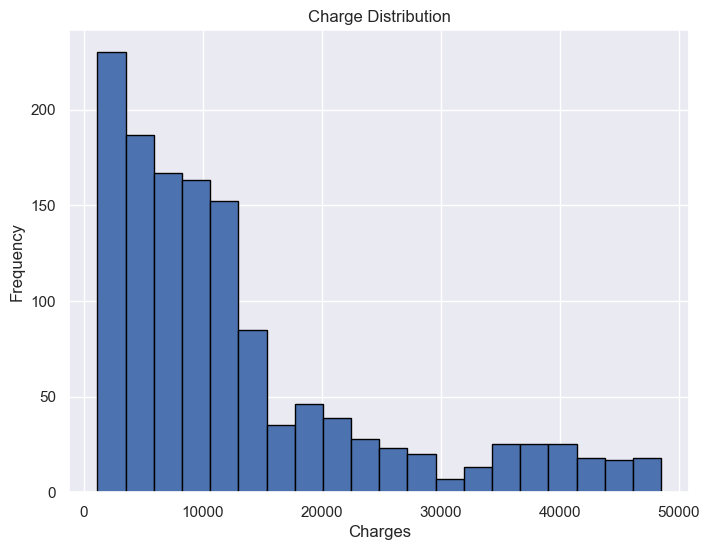

In [53]:
plt.figure(figsize=(8, 6))
plt.hist(new_data['charges'], bins=20, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charge Distribution')
plt.show()

In [54]:
#It appears that charges does not follow a normal distribution because of some outliers on the right hand side ie. towards the side of high charges.

<Axes: title={'center': 'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

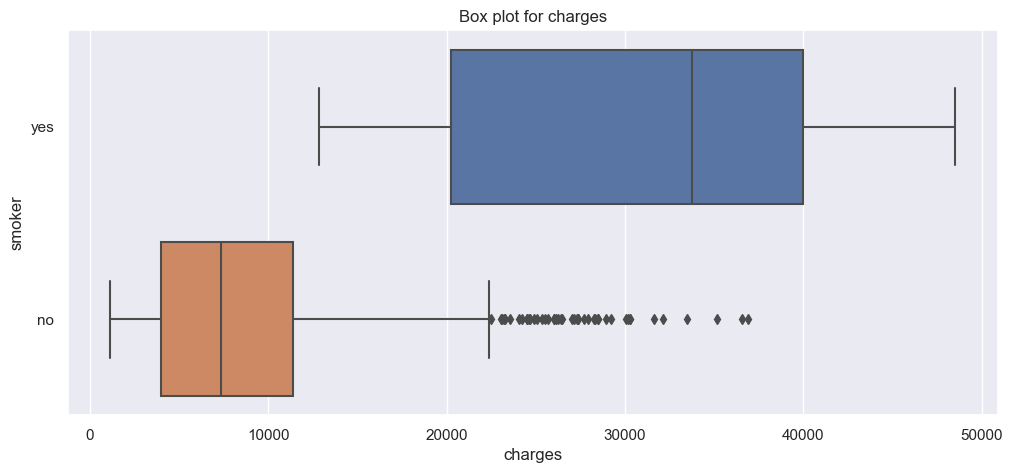

In [55]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges", data = new_data, orient="h")

In [56]:
#It appears that the medical insurance charges for smokers is fairly high as compared to that of the non smokers.

### Age and Charges

Text(0.5, 1.0, 'Scatter plot of age and charges')

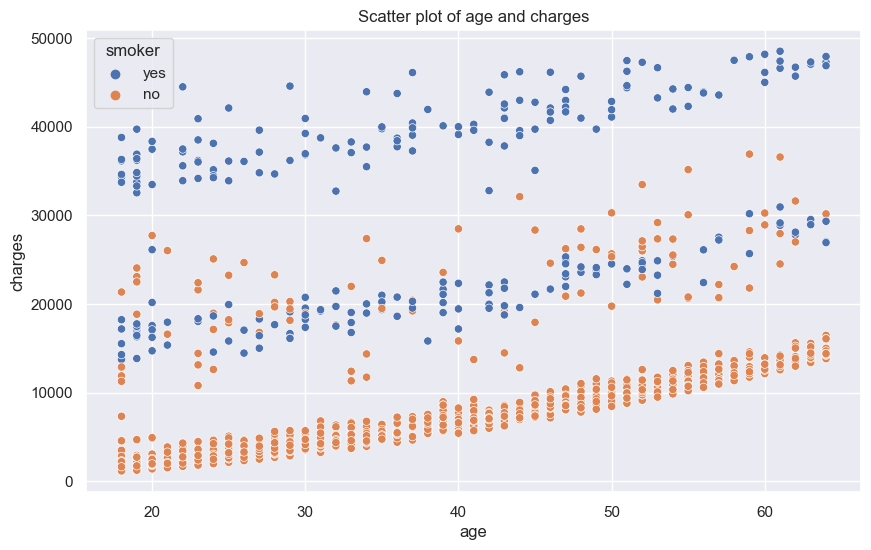

In [57]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='age',y='charges',data=new_data,hue='smoker')
ax.set_title('Scatter plot of age and charges')

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
    

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

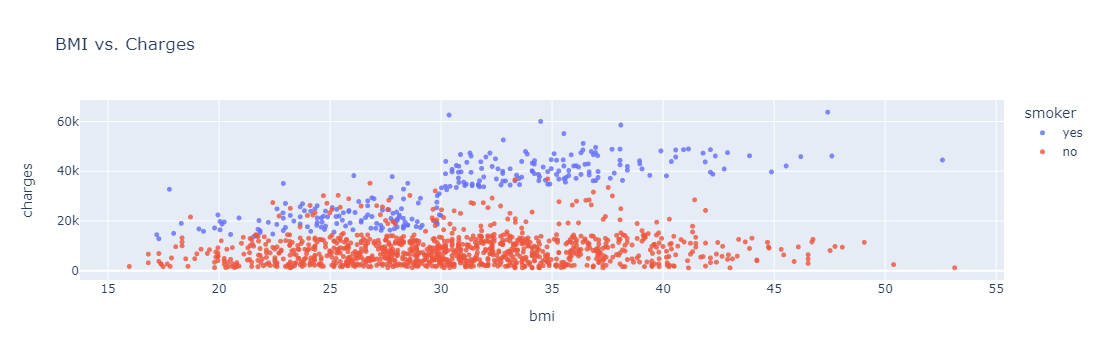

In [58]:
fig = px.scatter(data,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Region and Charges

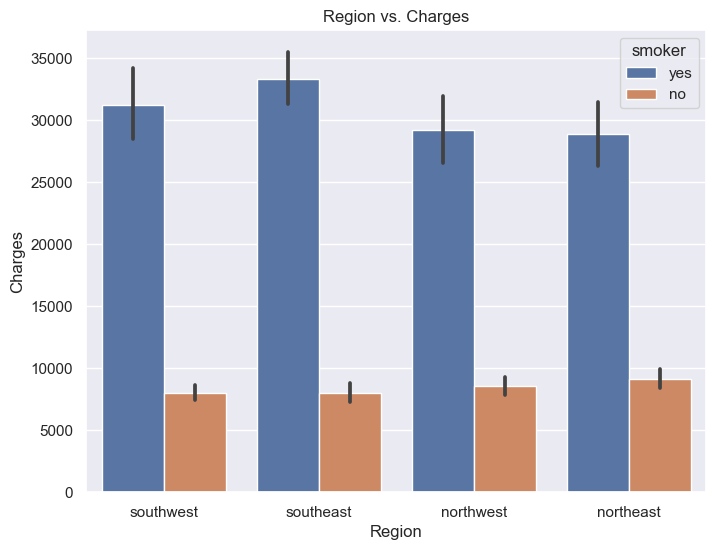

In [59]:
plt.figure(figsize=(8, 6))
sns.barplot(data=new_data, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

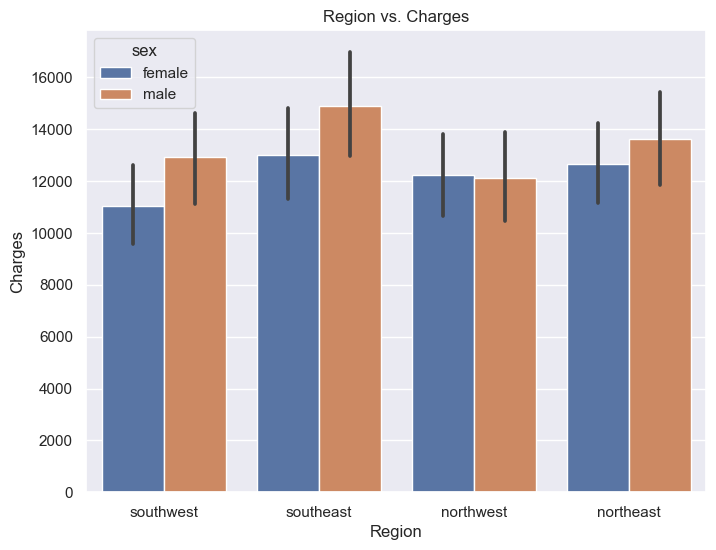

In [60]:
plt.figure(figsize=(8, 6))
sns.barplot(data=new_data, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

## Smoker and Charges

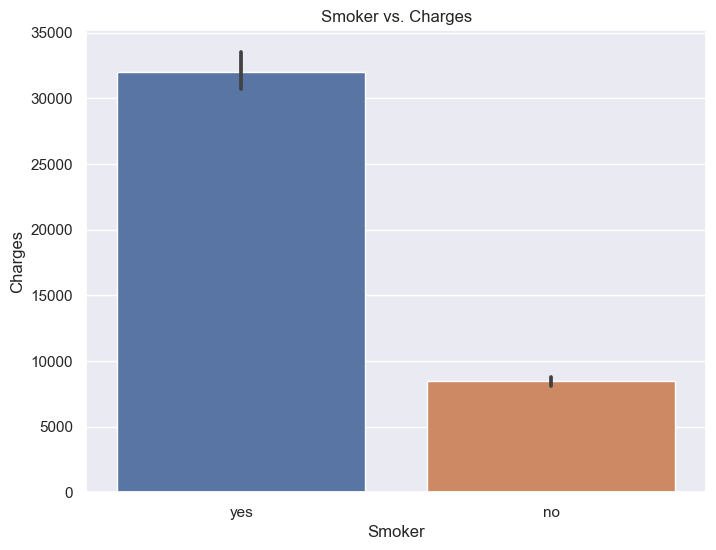

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

## Children and Charges

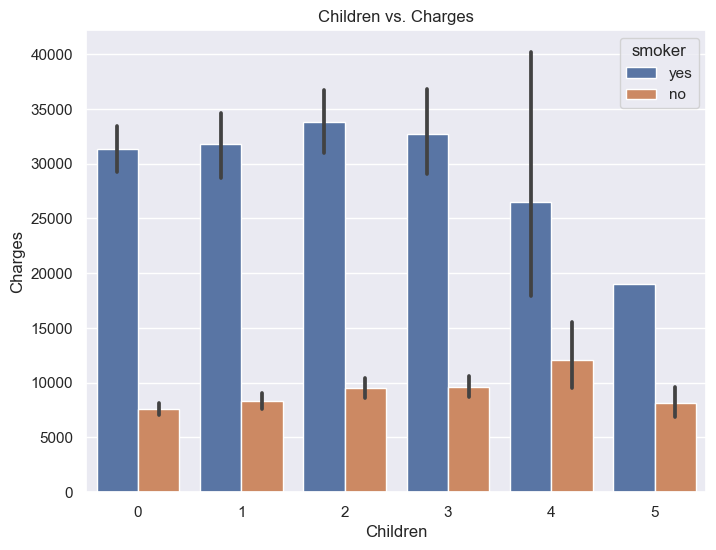

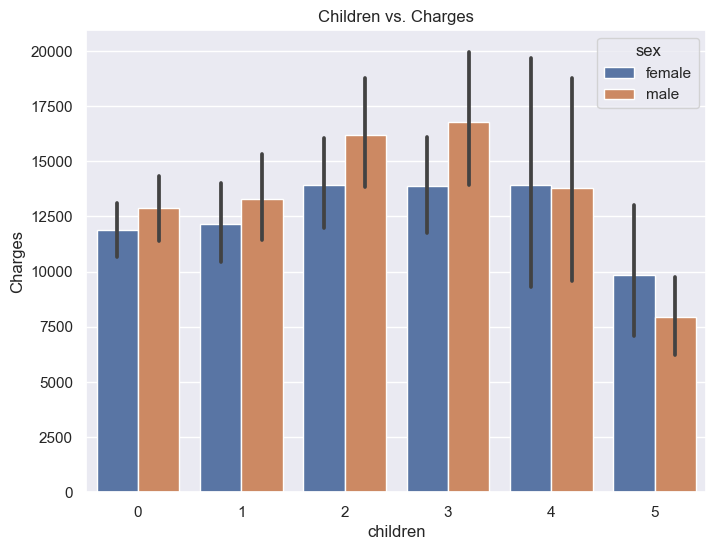

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='children', y='charges', hue='smoker')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Children vs. Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='children', y='charges', hue='sex')
plt.xlabel('children')
plt.ylabel('Charges')
plt.title('Children vs. Charges')
plt.show()

## Checking the OLS assumptions

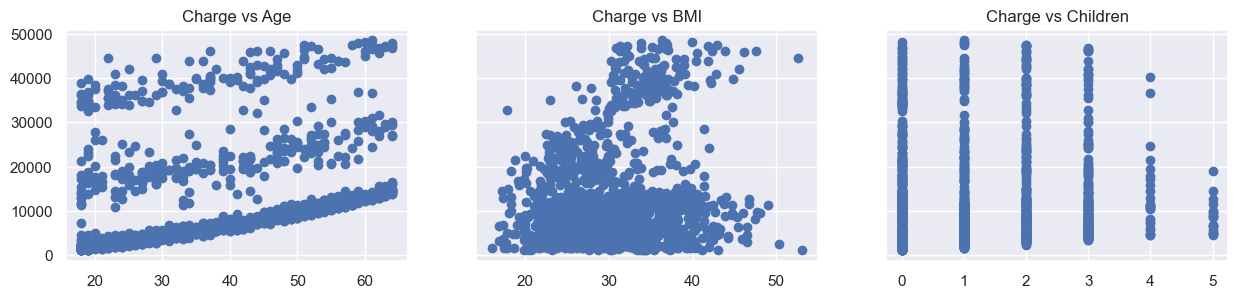

In [66]:
#Since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'charge' as y
ax1.scatter(new_data['age'],new_data['charges'])
ax1.set_title('Charge vs Age')
ax2.scatter(new_data['bmi'],new_data['charges'])
ax2.set_title('Charge vs BMI')
ax3.scatter(new_data['children'],new_data['charges'])
ax3.set_title('Charge vs Children')


plt.show()

### Relaxing the assumptions

In [67]:
# Let's transform 'charges' with a log transformation
log_charges = np.log(new_data['charges'])

# Then we add it to our data frame
new_data['log_charges'] = log_charges
new_data

C:\Users\178ab\AppData\Local\Temp\ipykernel_9852\1067204568.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      log_charges  
0        9.734176  
1        7.453302  
2        8.400538  
3        9.998092  
4        8.260197  
...           ...  
1333     9.268661  
1334     7.698927  
1335     7.396233  
1336     7.604867  
1337    10.279914  

[1323 rows x 8 columns]

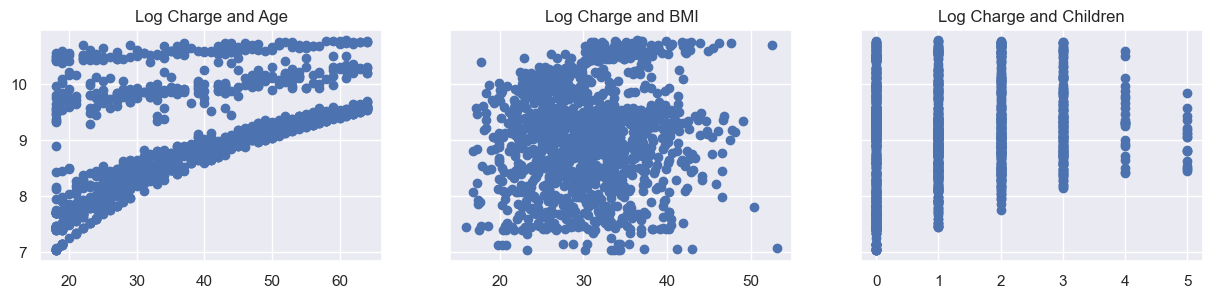

In [68]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'charge' as y
ax1.scatter(new_data['age'],new_data['log_charges'])
ax1.set_title('Log Charge and Age')
ax2.scatter(new_data['bmi'],new_data['log_charges'])
ax2.set_title('Log Charge and BMI')
ax3.scatter(new_data['children'],new_data['log_charges'])
ax3.set_title('Log Charge and Children')

plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

### Multicollinearity

In [69]:
# Let's quickly see the columns of our data frame
new_data.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_charges'], dtype=object)

In [70]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = new_data[['age','bmi','children']]

# we create a new data frame which will include all the VIFs
#each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [71]:
# Let's explore the result
vif

VIF  Features
0  7.471032       age
1  7.786563       bmi
2  1.801562  children

## Creating the Regression

#### Declaring the dependent and the independent variables

In [74]:
# The target(s) (dependent variable) is 'log_charge'
targets = new_data['log_charges']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_with_dummies.drop(['log_charges'],axis=1)

### Scaling the data

In [75]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [76]:
# Scaling the features and storing them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[-1.43454884, -0.44255703, -0.91042638, ..., -0.56716693,
        -0.60791876,  1.76314936],
       [-1.50590145,  0.52482691, -0.0814559 , ..., -0.56716693,
         1.64495664, -0.56716693],
       [-0.79237534,  0.39792987,  1.57648505, ..., -0.56716693,
         1.64495664, -0.56716693],
       ...,
       [-1.50590145,  1.03241509, -0.91042638, ..., -0.56716693,
         1.64495664, -0.56716693],
       [-1.29184362, -0.78863988, -0.91042638, ..., -0.56716693,
        -0.60791876,  1.76314936],
       [ 1.56226085, -0.24973945, -0.91042638, ...,  1.76314936,
        -0.60791876, -0.56716693]])

### Train Test Split

In [77]:
# Importing the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Creating the Regression

In [78]:
# Creating a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [79]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

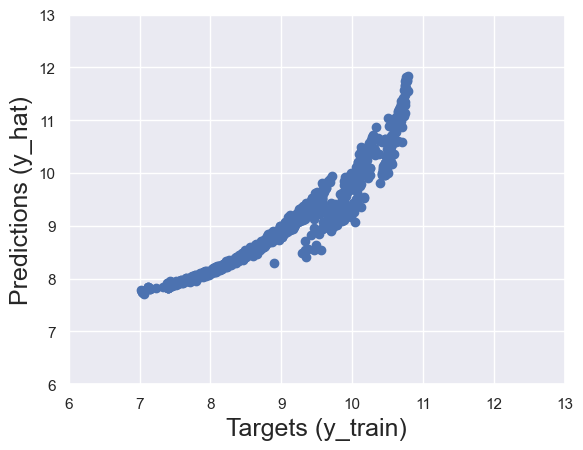

In [80]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [81]:
#Our result is not perfect but its definitely not random,we can clearly see that the points are situated aqround the 45 degree line

C:\Users\178ab\AppData\Local\Temp\ipykernel_9852\1719987585.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Residuals PDF')

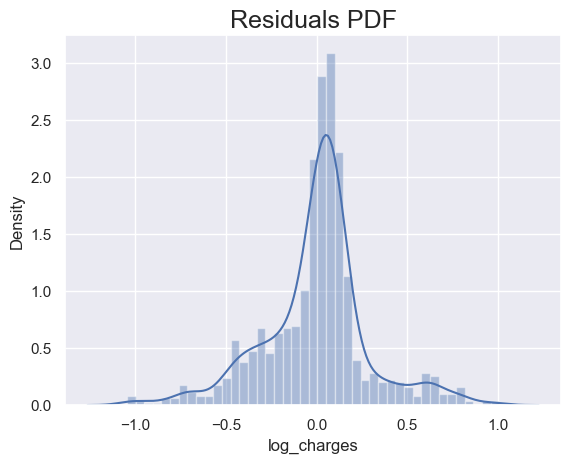

In [82]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [83]:
# Finding the R-squared of the model
reg.score(x_train,y_train)

0.8982881984253669

In [84]:
#this implies that the model is explaining the 89% of the variability of the data

### Finding the weights and bias

In [85]:
# Obtaining the bias (intercept) of the regression
reg.intercept_

9.077386074343845

In [86]:
# Obtaining the weights (coefficients) of the regression
reg.coef_

array([ 0.28719906, -0.0173166 ,  0.089779  ,  0.66236877, -0.02525623,
        0.08442954, -0.01765048, -0.05172717, -0.04258044])

In [87]:
# Creating a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               age  0.287199
1               bmi -0.017317
2          children  0.089779
3           charges  0.662369
4          sex_male -0.025256
5        smoker_yes  0.084430
6  region_northwest -0.017650
7  region_southeast -0.051727
8  region_southwest -0.042580

## Testing

In [88]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

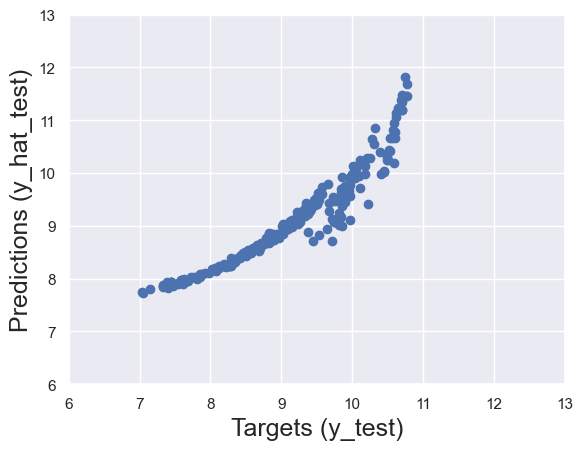

In [89]:
# Creating a scatter plot with the test targets and the test predictions
# We can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [90]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_charges
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0   8889.649424
1   7633.292942
2  13678.816334
3  28063.701760
4   4021.713123

In [91]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

Prediction      Target
0     8889.649424         NaN
1     7633.292942         NaN
2    13678.816334         NaN
3    28063.701760         NaN
4     4021.713123         NaN
..            ...         ...
260   8832.545741         NaN
261   2725.733793  17085.2676
262  21691.635436         NaN
263  17590.243607         NaN
264   5848.804978         NaN

[265 rows x 2 columns]

In [92]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     9.784057
1     9.028154
2     9.520442
3    10.496751
4     8.312492
Name: log_charges, dtype: float64

In [93]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction       Target
0     8889.649424  17748.50620
1     7633.292942   8334.45755
2    13678.816334  13635.63790
3    28063.701760  36197.69900
4     4021.713123   4074.45370
..            ...          ...
260   8832.545741   9101.79800
261   2725.733793   1880.48700
262  21691.635436  21880.82000
263  17590.243607  21223.67580
264   5848.804978   6781.35420

[265 rows x 2 columns]

In [94]:
# Additionally, we can calculate the difference between the targets and the predictions
# this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [95]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction       Target     Residual  Difference%
0     8889.649424  17748.50620  8858.856776    49.913253
1     7633.292942   8334.45755   701.164608     8.412840
2    13678.816334  13635.63790   -43.178434     0.316659
3    28063.701760  36197.69900  8133.997240    22.471034
4     4021.713123   4074.45370    52.740577     1.294421
..            ...          ...          ...          ...
260   8832.545741   9101.79800   269.252259     2.958232
261   2725.733793   1880.48700  -845.246793    44.948292
262  21691.635436  21880.82000   189.184564     0.864614
263  17590.243607  21223.67580  3633.432193    17.119712
264   5848.804978   6781.35420   932.549222    13.751667

[265 rows x 4 columns]

In [96]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction        Target      Residual  Difference%
count     265.000000    265.000000    265.000000   265.000000
mean    14376.057469  13327.996574  -1048.060895    21.431658
std     19225.785702  11367.774448  10956.516758    26.519613
min      2279.274691   1137.011000 -89159.456255     0.061456
25%      5221.344457   5458.046450   -516.899695     5.365468
50%      8265.122078   9724.530000    361.435775    11.489314
75%     13742.827570  18218.161390   1169.342453    27.155262
max    135877.619505  47496.494450  15528.318258   190.845380

In [97]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

Prediction   Target  Residual  Difference%
233    10594.03 10600.55      6.51         0.06
43      4461.08  4454.40     -6.68         0.15
224     3953.65  3947.41     -6.24         0.16
2      13678.82 13635.64    -43.18         0.32
40      6920.23  6877.98    -42.25         0.61
107     4009.42  3981.98    -27.44         0.69
122     3719.58  3693.43    -26.15         0.71
105    11939.35 12029.29     89.94         0.75
262    21691.64 21880.82    189.18         0.86
202     4278.23  4234.93    -43.30         1.02
250     8075.25  8162.72     87.47         1.07
72     33121.84 32734.19   -387.65         1.18
11      6667.83  6748.59     80.77         1.20
4       4021.71  4074.45     52.74         1.29
254     5633.17  5708.87     75.69         1.33
158     4783.25  4719.74    -63.52         1.35
207     5150.18  5080.10    -70.08         1.38
126     4914.05  4846.92    -67.13         1.38
191    10817.80 10977.21    159.41         1.45
21      4387.65  4462.72     75.07         1.68
38      8441.57  8596.83    155.26         1.81
221     5330.58  5428.73     98.14         1.81
148     4419.84  4504.66     84.83         1.88
112    11459.22 11244.38   -214.84         1.91
51      4100.16  4185.10     84.94         2.03
111     5341.52  5458.05    116.52         2.13
53      3791.28  3875.73     84.45         2.18
181     8437.04  8252.28   -184.76         2.24
25      4667.06  4564.19   -102.87         2.25
212    23838.86 23306.55   -532.32         2.28
78      7008.15  7173.36    165.21         2.30
239     6383.89  6551.75    167.86         2.56
85      6960.92  7144.86    183.94         2.57
252     4845.96  4718.20   -127.76         2.71
190     9831.14 10106.13    275.00         2.72
94     10846.38 11150.78    304.40         2.73
173    13286.93 12913.99   -372.94         2.89
260     8832.55  9101.80    269.25         2.96
14     11945.27 12323.94    378.67         3.07
76      4262.17  4134.08   -128.09         3.10
186     3812.44  3935.18    122.74         3.12
20      7012.62  6799.46   -213.17         3.14
189     5868.41  6059.17    190.77         3.15
154    12521.70 12928.79    407.09         3.15
24     14848.49 14394.56   -453.93         3.15
160     4325.35  4189.11   -136.24         3.25
79      5909.69  6128.80    219.11         3.58
95     21419.91 22218.11    798.20         3.59
52      8103.99  8410.05    306.05         3.64
248     5180.49  5385.34    204.85         3.80
178    29371.59 28287.90  -1083.69         3.83
136     9075.56  9447.38    371.82         3.94
46     13742.83 13204.29   -538.54         4.08
137    10534.44 10096.97   -437.47         4.33
81     14527.41 13919.82   -607.59         4.36
96     14215.22 13616.36   -598.86         4.40
101     5225.99  5469.01    243.02         4.44
33     20314.07 21259.38    945.30         4.45
164    11296.41 11830.61    534.20         4.52
83     25271.84 26467.10   1195.25         4.52
182    12744.19 13352.10    607.91         4.55
253    13244.08 13880.95    636.87         4.59
172    11661.84 12222.90    561.06         4.59
102     4222.88  4032.24   -190.64         4.73
259     6789.66  7151.09    361.44         5.05
13     11304.60 11945.13    640.54         5.36
118     4983.80  5266.37    282.57         5.37
104     3772.35  3579.83   -192.52         5.38
8       7854.38  8310.84    456.46         5.49
197    11262.73 11938.26    675.52         5.66
6       5767.77  6117.49    349.73         5.72
119     5394.38  5729.01    334.62         5.84
203     3753.36  3994.18    240.82         6.03
140    10752.33 11454.02    701.69         6.13
165     7996.74  8522.00    525.26         6.16
66     15050.30 14119.62   -930.68         6.59
134     8664.91  9288.03    623.12         6.71
18     43156.62 40419.02  -2737.60         6.77
226     4883.30  5240.77    357.47         6.82
127    11028.80 11842.62    813.82         6.87
206     4609.12  4949.76    340.64         6.88
45     20344.68 19023.26  -1321.42         6.95
177     9292.96  9991